In [77]:
%run project_functions.ipynb

In [2]:
file_name = 'FB.txt'
csv_name = 'FB.csv'

# Classification

In [3]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000, 'default')
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'bin', 'default')

#Split
X_train = company_data['X_train']
Y_train = company_data['Y_train']
X_test = company_data['X_test']
Y_test = company_data['Y_test']

In [4]:
#Build Model
model = build_neural_network_cf(1003)

#Fit Model
model.fit(X_train, Y_train, epochs=100, batch_size=10)

#Predict
pred_train = model.predict_classes(X_train)
pred_test = model.predict_classes(X_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
238/238 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5252
Epoch 2/100
238/238 [==============================] - 0s 612us/step - loss: 0.6741 - accuracy: 0.5588
Epoch 3/100
238/238 [==============================] - 0s 641us/step - loss: 0.6585 - accuracy: 0.6218
Epoch 4/100
238/238 [==============================] - 0s 627us/step - loss: 0.6338 - accuracy: 0.7395
Epoch 5/100
238/238 [==============================] - 0s 620us/step - loss: 0.5870 - accuracy: 0.8025
Epoch 6/100
238/238 [==============================] - 0s 501us/step - loss: 0.4961 - accuracy: 0.8655
Epoch 7/100
238/238 [==============================] - 0s 417us/step - loss: 0.3884 - accuracy: 0.8866
Epoch 8/100
238/238 [==============================] - 0s 411us/step - loss: 0.2515 - accuracy: 0.9454
Epoch 9/100
238/238 [==============================] - ETA: 0s - loss: 0.1745 - acc

238/238 [==============================] - 0s 886us/step - loss: 1.4353e-04 - accuracy: 1.0000
Epoch 73/100
238/238 [==============================] - 0s 1ms/step - loss: 1.3847e-04 - accuracy: 1.0000
Epoch 74/100
238/238 [==============================] - 0s 875us/step - loss: 1.3491e-04 - accuracy: 1.0000
Epoch 75/100
238/238 [==============================] - 0s 402us/step - loss: 1.3108e-04 - accuracy: 1.0000
Epoch 76/100
238/238 [==============================] - 0s 691us/step - loss: 1.2554e-04 - accuracy: 1.0000
Epoch 77/100
238/238 [==============================] - 0s 1ms/step - loss: 1.2121e-04 - accuracy: 1.0000
Epoch 78/100
238/238 [==============================] - 0s 1ms/step - loss: 1.1684e-04 - accuracy: 1.0000
Epoch 79/100
238/238 [==============================] - 0s 813us/step - loss: 1.1453e-04 - accuracy: 1.0000
Epoch 80/100
238/238 [==============================] - 0s 510us/step - loss: 1.1110e-04 - accuracy: 1.0000
Epoch 81/100
238/238 [=========================

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                64256     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 70,529
Trainable params: 70,529
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Generate Confusion Matrices
confusion_train = confusion_matrix(Y_train, pred_train)
confusion_test = confusion_matrix(Y_test, pred_test)

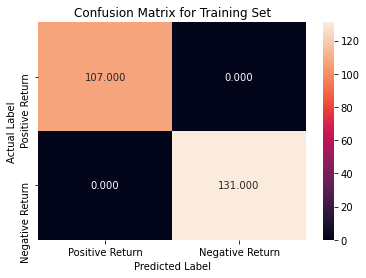

In [7]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train, "Training")

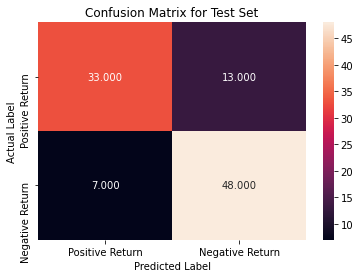

In [8]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test, "Test")

In [9]:
#Calculate Metrics
table = create_metrics_table(Y_train, pred_train, Y_test, pred_test)
table

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.000000,1.000000,1.00000
Test,0.872727,0.786885,0.827586,0.80198


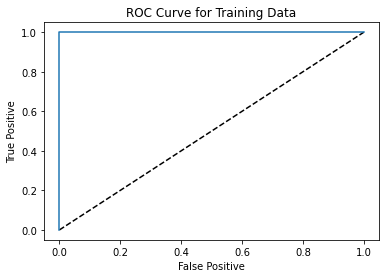

In [10]:
#Generate ROC Curves for Training
pred_train_prob = model.predict(X_train)
FPR_train, TPR_train, Threshold_train = roc_curve(Y_train, pred_train_prob)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_train, TPR_train, "Training")

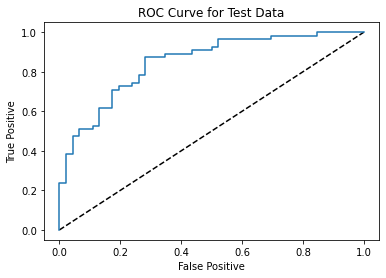

In [11]:
#Generate ROC Curves for Test
pred_test_prob = model.predict(X_test)
FPR_test, TPR_test, Threshold_test = roc_curve(Y_test, pred_test_prob)

#Plot ROC Curve for Training Data
plot_ROC_curve(FPR_test, TPR_test, "Test")

# Regression

In [12]:
#Features
company = stock_twits_text_parser(file_name)
company_metrics = stock_twits_metrics(company, 3, file_name)

#Labels
company_return = return_over_period_T(csv_name,3)

#Cleaned Data
agg_data = feature_selector(company_metrics, company_return, 'close_return', 25, 1000,'default')
company_data = split_data(agg_data, 0.7, 'all', 'close_return', 'cont', 'default')

#Split
X_train_reg = company_data['X_train']
Y_train_reg = company_data['Y_train']
X_test_reg = company_data['X_test']
Y_test_reg = company_data['Y_test']

In [34]:
reg_model = build_neural_network_reg(1003)

In [35]:
reg_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               128512    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 227,585
Trainable params: 227,585
Non-trainable params: 0
_________________________________________________________________


In [69]:
reg_model.fit(X_train_reg, Y_train_reg, epochs=100, batch_size = 10)

Epoch 1/100
238/238 [==============================] - 0s 599us/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 2/100
238/238 [==============================] - 0s 553us/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 3/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 4/100
238/238 [==============================] - 0s 734us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 5/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 6/100
238/238 [==============================] - 0s 820us/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 7/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 8/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 9/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_absolut

238/238 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 72/100
238/238 [==============================] - 0s 711us/step - loss: 9.7153e-04 - mean_absolute_error: 9.7153e-04
Epoch 73/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 
Epoch 74/100
238/238 [==============================] - 0s 767us/step - loss: 0.0011 - mean_absolute_error: 0.0011 
Epoch 75/100
238/238 [==============================] - 0s 859us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 76/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 77/100
238/238 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 
Epoch 78/100
238/238 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 79/100
238/238 [==============================] - 0s 958us/step - loss: 0.0010 - mean_

In [70]:
pred_train_reg = reg_model.predict(X_train_reg)
pred_test_reg = reg_model.predict(X_test_reg)

In [71]:
as_train, as_test, as_predict_train, as_predict_test = action_signal_mapping(Y_train_reg, Y_test_reg, 
                                                                             pred_train_reg, pred_test_reg, 0.005)

In [72]:
as_train_metrics, as_test_metrics, as_predict_train_metrics , as_predict_test_metrics = metrics_mapping_action_signals(as_train, as_test, as_predict_train, as_predict_test)


In [73]:
#Generate Confusion Matrices
confusion_train_reg = confusion_matrix(as_train_metrics, as_predict_train_metrics)
confusion_test_reg = confusion_matrix(as_test_metrics, as_predict_test_metrics)

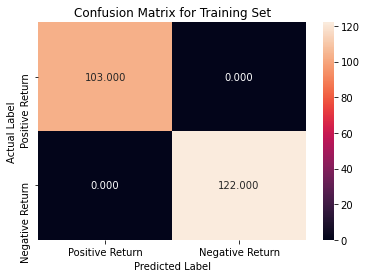

In [74]:
#Plot Confusion Matrix for Training Data
plot_confusion_matrix(confusion_train_reg, "Training")

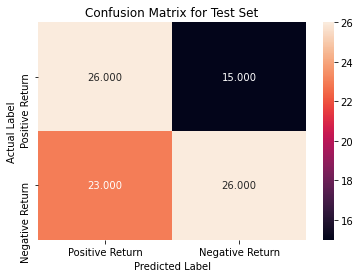

In [75]:
#Plot Confusion Matrix for Test Data
plot_confusion_matrix(confusion_test_reg, "Test")

In [76]:
#Calculate Metrics
table_reg = create_metrics_table(as_train_metrics, as_predict_train_metrics, as_test_metrics, as_predict_test_metrics)
table_reg

,Recall,Precision,F1 Score,Accuracy
Dataset,,,,
Training,1.000000,1.000000,1.000000,1.000000
Test,0.530612,0.634146,0.577778,0.577778
